<a href="https://colab.research.google.com/github/A1IXAVIER/uncolegg/blob/main/stockmarketpredictionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using data from Apple's stock.
df = pd.read_csv('all_stocks_5yr.csv') 

In [3]:
df.head()



,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21793 entries, 0 to 21792
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    21793 non-null  object 
 1   open    21793 non-null  float64
 2   high    21793 non-null  float64
 3   low     21793 non-null  float64
 4   close   21793 non-null  float64
 5   volume  21793 non-null  int64  
 6   Name    21793 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,open,high,low,close,volume
count,21793.000000,21793.000000,21793.000000,21793.000000,2.179300e+04
mean,80.398211,81.143086,79.655831,80.431519,6.445308e+06
std,54.081508,54.598747,53.539392,54.086312,1.470716e+07
min,8.600000,8.650000,8.220000,8.540000,9.485900e+04
25%,45.800000,46.265000,45.360000,45.800000,1.608860e+06
50%,64.200000,64.700000,63.610000,64.170000,2.565918e+06
75%,99.020000,99.910000,98.130000,99.030000,4.972888e+06
max,309.930000,312.000000,305.942100,309.910000,2.668336e+08


In [6]:
df.shape

(21793, 7)

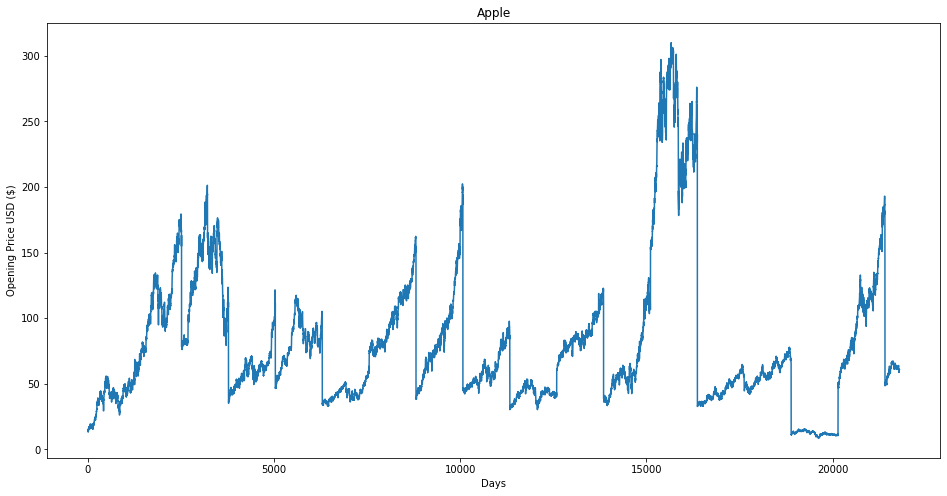

In [7]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

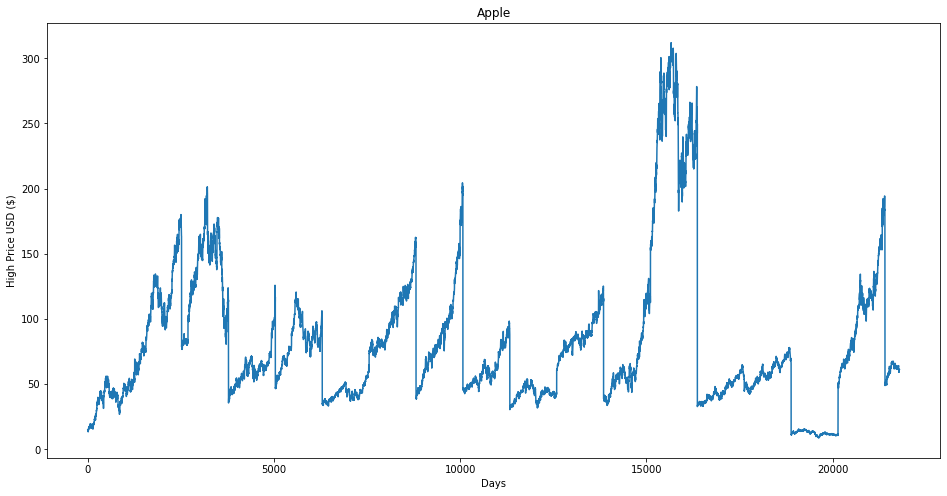

In [8]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

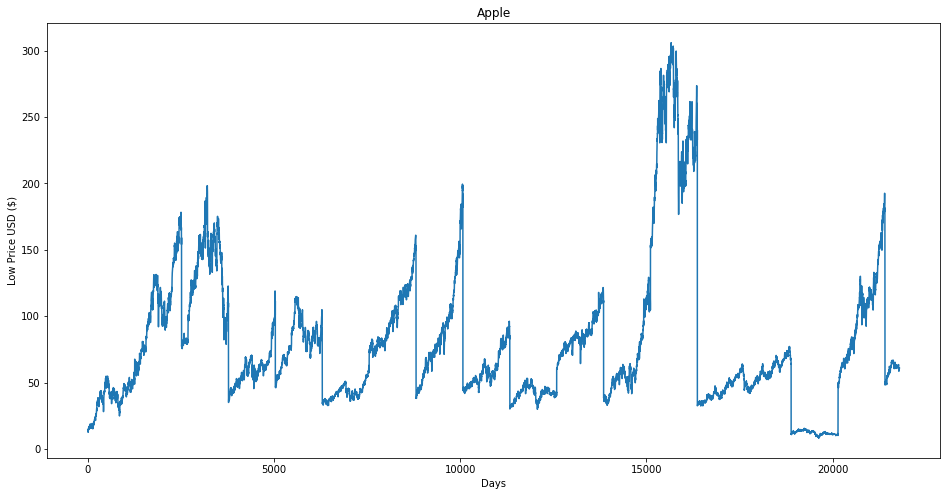

In [9]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

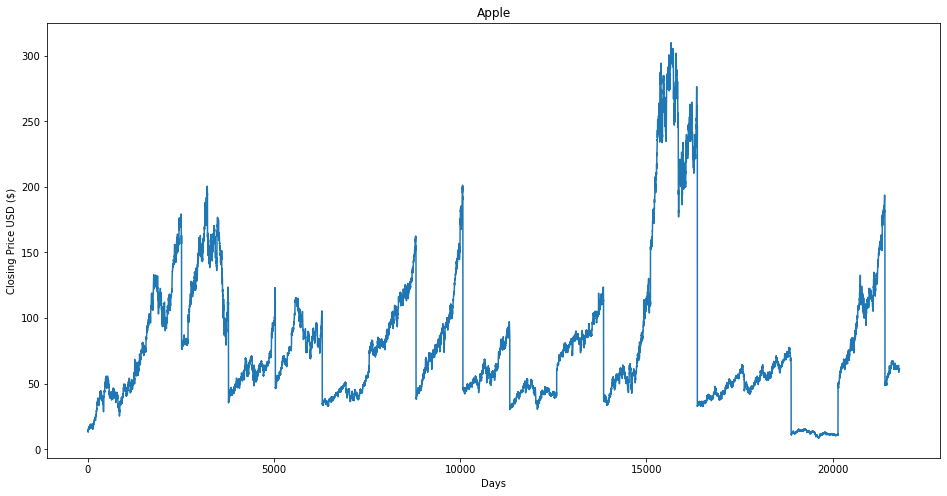

In [10]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [12]:
df2 = df['close']

In [13]:
df2.tail()

21788    60.93
21789    61.01
21790    60.55
21791    60.84
21792    61.04
Name: close, dtype: float64

In [14]:
df2 = pd.DataFrame(df2)     

In [15]:
df2.tail()

,close
21788,60.93
21789,61.01
21790,60.55
21791,60.84
21792,61.04


In [16]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [17]:
df2.tail()

,close,Prediction
21788,60.93,NaN
21789,61.01,NaN
21790,60.55,NaN
21791,60.84,NaN
21792,61.04,NaN


In [18]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[14.75]
 [14.46]
 [14.27]
 ...
 [63.32]
 [63.46]
 [64.02]]


<ipython-input-18-5c69b61eae2a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [19]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75 16.84 16.94 ... 60.55 60.84 61.04]


Linear and Decision Tree Regression


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [22]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [23]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-23-4ab4510f9901>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[65.75],
       [65.68],
       [65.25],
       [66.27],
       [67.47],
       [67.48],
       [66.9 ],
       [66.28],
       [66.21],
       [66.54],
       [66.57],
       [66.22],
       [66.44],
       [66.44],
       [66.37],
       [66.25],
       [65.54],
       [65.71],
       [65.7 ],
       [66.64],
       [66.45],
       [66.27],
       [65.72],
       [65.64],
       [65.96],
       [66.36],
       [66.01],
       [66.59],
       [66.  ],
       [65.65],
       [66.35],
       [66.48],
       [67.11],
       [67.25],
       [66.69],
       [66.8 ],
       [65.96],
       [66.15],
       [64.88],
       [65.09],
       [64.63],
       [64.27],
       [65.17],
       [64.1 ],
       [64.7 ],
       [64.94],
       [64.83],
       [64.71],
       [64.83],
       [64.4 ],
       [63.56],
       [62.29],
       [61.79],
       [62.45],
       [62.12],
       [63.2 ],
       [62.78],
       [60.72],
       [61.47],
       [61.76],
       [61.73],
       [62.68],
       [

In [24]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[78.25       69.97333333 62.605      61.85       66.1175     51.18
 61.19       62.72       72.48666667 66.12333333 63.44333333 62.78
 65.85666667 65.85666667 62.61       61.85       65.67333333 68.155
 65.9        67.545      62.68       61.85       62.59       70.085
 67.64       67.18       66.94       61.934      61.89       62.87
 66.41       58.40666667 61.28       75.21666667 61.31       61.34
 67.64       61.44       68.06333333 61.295      61.41       61.93
 72.72       63.48       52.79       63.29       62.18       67.13
 62.18       62.14       61.475      63.64333333 64.705      63.86666667
 66.4925     62.47       63.08       62.63       62.72       50.6
 63.83       62.53       67.09       62.71       54.72       71.17
 65.92       64.395      70.98       60.54       58.13333333 63.64333333
 59.85666667 64.18       59.37       63.205      70.25333333 65.37
 66.01333333 64.85       63.95833333 65.67333333 78.         69.795
 69.975      63.65       66.96666667 69.11      

In [25]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[67.66902233 67.60808539 67.2337585  68.1216967  69.16632988 69.17503516
 68.67012912 68.13040198 68.06946505 68.35673917 68.382855   68.07817032
 68.2696864  68.2696864  68.20874947 68.10428615 67.48621152 67.63420122
 67.62549595 68.44379193 68.27839168 68.1216967  67.6429065  67.57326429
 67.85183313 68.20004419 67.89535952 68.40026555 67.88665424 67.58196956
 68.19133892 68.30450751 68.85293993 68.9748138  68.48731832 68.58307636
 67.85183313 68.01723339 66.91166327 67.09447408 66.69403136 66.38064141
 67.16411629 66.23265171 66.7549683  66.96389493 66.86813689 66.76367357
 66.86813689 66.49381    65.76256678 64.65699667 64.22173284 64.79628109
 64.50900697 65.44917683 65.08355521 63.29026826 63.94316399 64.19561701
 64.16950118 64.99650245 64.77887054 64.76145998 65.05743938 65.09226049
 65.38823989 65.30118712 64.78757581 65.20542908 64.68311249 64.66570194
 64.85721802 64.92686024 65.6058718  66.21524116 66.1630095  67.12929519
 67.02483187 67.20764267 67.54714846 67.48621152 66

In [26]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-26-3343a07a945e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


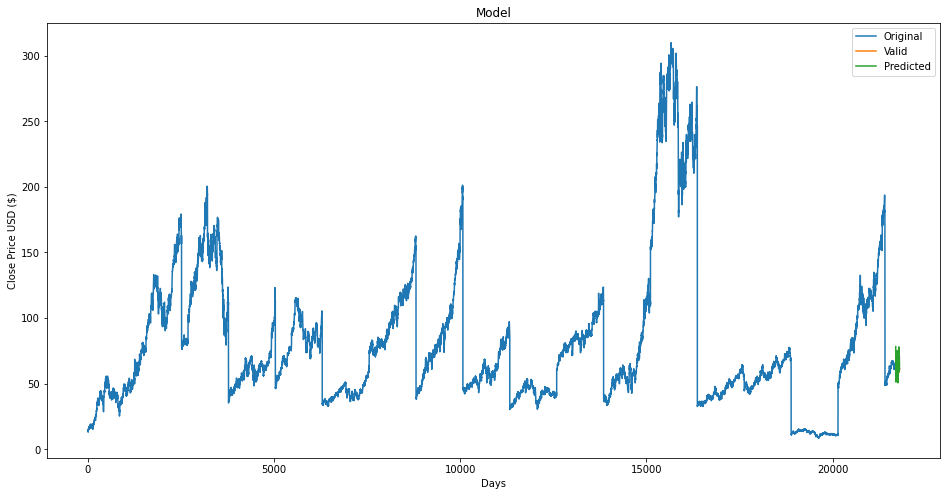

In [27]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()